http://www.b3.com.br/data/files/C8/F3/08/B4/297BE410F816C9E492D828A8/SeriesHistoricas_Layout.pdf

In [1]:
ticker = 'LREN3'

In [2]:
import pandas as pd
import statistics
import requests
import os
import zipfile
import random

In [3]:
os.chdir('/home/yair/GHub/Codigos-em-financas/data')

ano = "2024"
nome_arquivo = f'COTAHIST_A{ano}'
url = f'https://bvmf.bmfbovespa.com.br/InstDados/SerHist/{nome_arquivo}.ZIP'

try:
    with zipfile.ZipFile(f'{nome_arquivo}.ZIP', 'r') as zip_ref:
        with zip_ref.open(f'{nome_arquivo}.TXT') as file:
            data = pd.read_csv(file,header=None) 
except:
    response = requests.get(url, verify=False)
    if response.status_code == 200:
            with open(f'{nome_arquivo}.ZIP', 'wb') as file:
                         file.write(response.content)
            print(f"Download concluído: {nome_arquivo}")
    else:
        print(f"Erro ao baixar o arquivo. Código de status: {response.status_code}")
        
    with zipfile.ZipFile(f'{nome_arquivo}.ZIP', 'r') as zip_ref:
        with zip_ref.open(f'{nome_arquivo}.TXT') as file:
            data = pd.read_csv(file,header=None)


In [4]:
with zipfile.ZipFile(f'{nome_arquivo}.ZIP', 'r') as zip_ref:
        with zip_ref.open(f'{nome_arquivo}.TXT') as file:
            data = pd.read_csv(file,header=None)

In [5]:
n=726
data.iloc[n][0]

'012024010214MILL11      010IT NOW MILL CI           R$  000000000507100000000050970000000005017000000000506200000000050970000000005016000000000539700005000000000000000007000000000000035440000000000000009999123100000010000000000000BRMILLCTF018100'

CODNEG - CÓDIGO DE NEGOCIAÇÃO DO PAPEL (12) 13:24

In [6]:
for n in  random.choices(range(0,len(data)),k=5):
    papel=data.iloc[n][0][12:24]
    print(n,papel)

496414 BRAPR238    
239974 CIELC500    
272930 PCARC480    
419074 BRFSB140    
1382329 BBASH531    


PREÇO DE ABERTURA DO PAPELMERCADO NO PREGÃO (11) [57:69]
PREÇO MÁXIMO DO PAPELMERCADO NO PREGÃO (11) [70:82]
PREÇO MÍNIMO DO PAPELMERCADO NO PREGÃO (11) [83:95]
PREÇO DO ÚLTIMO NEGÓCIO DO PAPEL-MERCADO NO PREGÃO (11) [109:121]

In [7]:
n=8657
open=data.iloc[n][0][56:69]
max=data.iloc[n][0][69:82]
min=data.iloc[n][0][82:95]
close=data.iloc[n][0][108:121]

print(float(open)/100,float(max)/100,float(min)/100,float(close)/100)

21.77 21.77 21.12 21.61


DATA DO PREGÃO FORMATO “AAAAMMDD” (08) 03:10

In [8]:
dia = data.iloc[n][0][2:10]
dia

'20240109'

In [9]:
papel = [ticker+'F', ticker]
papel

['LREN3F', 'LREN3']

In [10]:
dataMinF=[]
dataMaxF=[]
dataMinP=[]
dataMaxP=[]
dataOpenF=[]
dataOpenP=[]
dataCloseF=[]
dataCloseP=[]
for n in range (0,len(data)):
  if papel[0] in data.iloc[n][0][12:24] :
    dataMinF.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][82:95])/100])
    dataMaxF.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][69:82])/100])
    dataOpenF.append([data.iloc[n][0][2:10] , float(data.iloc[n][0][56:69])/100])
    dataCloseF.append([data.iloc[n][0][2:10] ,float(data.iloc[n][0][108:121])/100])
  if papel[1] in data.iloc[n][0][12:24] :
    dataMinP.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][82:95])/100])
    dataMaxP.append([data.iloc[n][0][2:10] ,  float(data.iloc[n][0][69:82])/100])
    dataOpenP.append([data.iloc[n][0][2:10] , float(data.iloc[n][0][56:69])/100])
    dataCloseP.append([data.iloc[n][0][2:10] ,float(data.iloc[n][0][108:121])/100])

In [11]:
min=[]
for f in dataMinF : 
    for p in dataMinP:
        if p[0] == f[0] : min.append([p[1],f[1]])

max=[]
for f in dataMaxF : 
    for p in dataMaxP:
        if p[0] == f[0] : max.append([p[1],f[1]])

open=[]
for f in dataOpenF : 
    for p in dataOpenP:
        if p[0] == f[0] : open.append([p[1],f[1]])

close=[]
for f in dataCloseF : 
    for p in dataCloseP:
        if p[0] == f[0] : close.append([p[1],f[1]])        

In [12]:
Dif = pd.DataFrame()
Dif['Min']   = [(x[0] - x[1]) for x in min]
Dif['Max']   = [(x[0] - x[1]) for x in max]
Dif['Open']  = [(x[0] - x[1]) for x in open]
Dif['Close'] = [(x[0] - x[1]) for x in close]

In [13]:
Dif.describe()

,Min,Max,Open,Close
count,615.000000,615.000000,615.000000,615.000000
mean,0.258634,-0.019675,0.113967,0.133154
std,0.376824,0.290478,0.367051,0.321944
min,-0.050000,-1.290000,-1.260000,-0.730000
25%,0.000000,-0.090000,-0.010000,0.000000
50%,0.100000,0.000000,0.000000,0.010000
75%,0.410000,0.010000,0.205000,0.195000
max,2.120000,1.650000,2.090000,2.040000


In [20]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers = 'png'  ## comentar se quiser grafico interativo

fig = go.Figure()
fig.add_trace(go.Box(x=Dif['Min'] , name='Min' , boxmean='sd') )
fig.add_trace(go.Box(x=Dif['Open'] , name='Open', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Close'] , name ='Close', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Max'] , name='Max', boxmean='sd'))

fig.update_layout(
    title= f'Diferença de preço Padrão x Fracionário de {ticker}',
    xaxis=dict(
        showgrid=True,
        zeroline=True,
        dtick=.5,
        gridwidth=2,
    ),
)

fig.show()

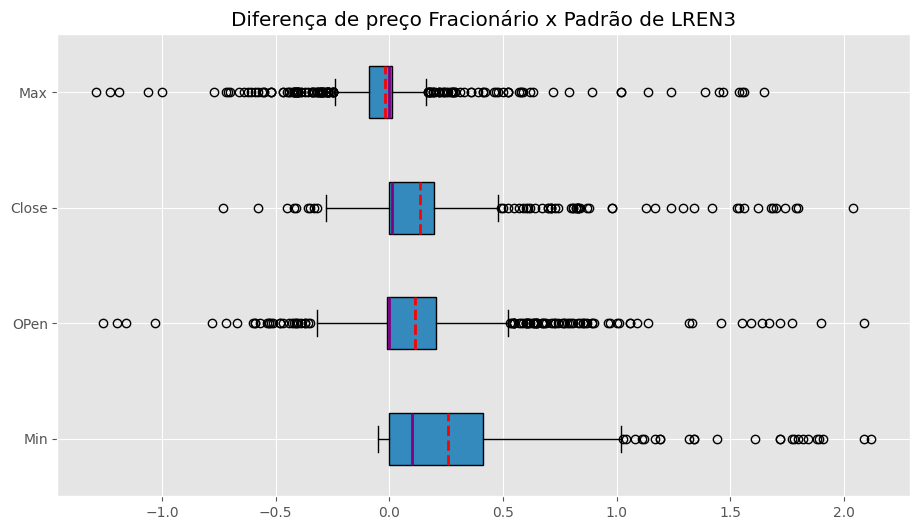

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(11, 6))
ax.boxplot((Dif['Min'], Dif['Open'] , Dif['Close'] , Dif['Max']), vert=False, showmeans=True, meanline=True,
           labels=('Min', 'OPen' , 'Close' , 'Max'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
ax.set_title('Diferença de preço Fracionário x Padrão de {}'.format(papel[1]))
plt.show()

In [ ]:
os.remove(f'{nome_arquivo}.ZIP)
